In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm
%matplotlib inline

In [3]:
df=pd.read_csv('AS Quiz-1 paul-newfood+%281%29.csv')

In [4]:
df.head()

,Sales,PriceLevel,AdLevel,StoreSize
0,620,1,1,34
1,774,1,1,41
2,955,1,2,32
3,669,1,2,28
4,623,1,1,34


In [5]:
df.describe()

,Sales,PriceLevel,AdLevel,StoreSize
count,24.000000,24.000000,24.000000,24.000000
mean,571.416667,2.000000,1.500000,32.333333
std,212.629279,0.834058,0.510754,6.424590
min,294.000000,1.000000,1.000000,19.000000
25%,393.250000,1.000000,1.000000,28.750000
50%,550.000000,2.000000,1.500000,32.000000
75%,677.000000,3.000000,2.000000,37.000000
max,1208.000000,3.000000,2.000000,43.000000


In [6]:
df.shape

(24, 4)

In [7]:
df.isnull().sum(
)

Sales         0
PriceLevel    0
AdLevel       0
StoreSize     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sales       24 non-null     int64
 1   PriceLevel  24 non-null     int64
 2   AdLevel     24 non-null     int64
 3   StoreSize   24 non-null     int64
dtypes: int64(4)
memory usage: 896.0 bytes


In [9]:
df['PriceLevel']=pd.Categorical(df['PriceLevel'])

In [10]:
df['PriceLevel'].value_counts()

1    8
2    8
3    8
Name: PriceLevel, dtype: int64

In [11]:
df['AdLevel']=pd.Categorical(df['AdLevel'])

In [12]:
df['AdLevel'].value_counts()

1    12
2    12
Name: AdLevel, dtype: int64

In [13]:
formula='Sales ~ C(PriceLevel) + C(AdLevel)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)

aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(PriceLevel),2.0,600412.583333,300206.291667,13.663982,0.000182
C(AdLevel),1.0,32.666667,32.666667,0.001487,0.969624
Residual,20.0,439412.583333,21970.629167,NaN,NaN


<AxesSubplot:xlabel='PriceLevel', ylabel='Sales'>

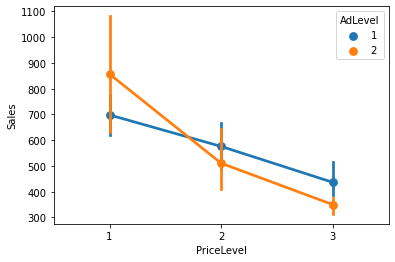

In [15]:
sns.pointplot(df['PriceLevel'],df['Sales'],hue=df['AdLevel'])